<a href="https://colab.research.google.com/github/Priyabrat845/Hyperparameter-Tuning-In-Python/blob/main/Hyperparameter_tuning_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hyperparameter Tuning: Grid Search vs Random Search**

Hyperparameter tuningf is one of the most important parts of machine Learning pipelines. A wrong choice of the hyperparameters’ values may lead to wrong results and a model with poor performance.

## **Grid search**
Grid search is the simplest algorithm for hyperparameter tuning. Basically, we divide the domain of the hyperparameters into a discrete grid. Then, we try every combination of values of this grid, calculating some performance metrics using cross-validation.

Grid search is an exhaustive algorithm that spans all the combinations, so it can actually find the best point in the domain. The great drawback is that it’s very slow. Checking every combination of the space requires a lot of time.

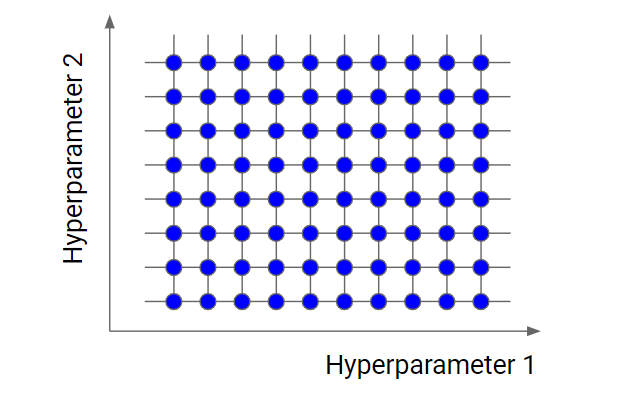

## **Random Search**
Random search is similar to grid search, but instead of using all the points in the grid, it tests only a randomly selected subset of these points. The smaller this subset, the faster but less accurate the optimization. 

Random search is a very useful option when you have several hyperparameters with a fine-grained grid of values. Using a subset made by 5-100 randomly selected points, we are able to get a reasonably good set of values of the hyperparameters.

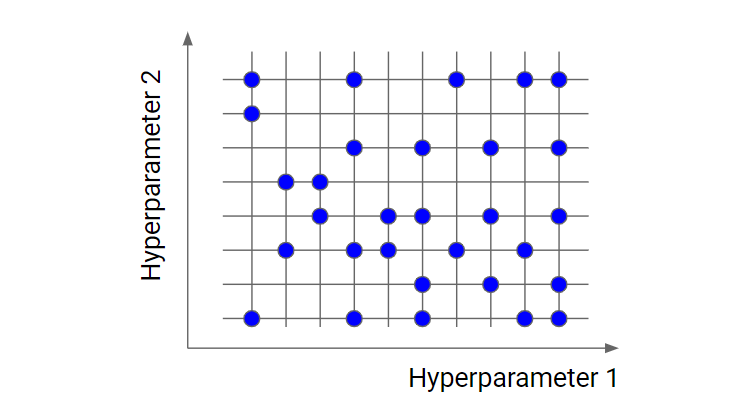


## **Hyperparameter Tuning In Python**

In [5]:
# Import the libraries.
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
# import dataset from sklearn library.
from sklearn.datasets import load_diabetes


In [6]:
# Split dataset into train & test.
# if,return_X_y=True then it return (data,target) set instead of bunch of objects(default value of return_X_y is False).
x,y=load_diabetes(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
x_train

array([[ 0.07076875,  0.05068012,  0.01211685, ...,  0.03430886,
         0.02736771, -0.0010777 ],
       [-0.00914709,  0.05068012, -0.01806189, ...,  0.07120998,
         0.00027149,  0.01963284],
       [ 0.00538306, -0.04464164,  0.04984027, ..., -0.00259226,
         0.01703713, -0.01350402],
       ...,
       [ 0.03081083, -0.04464164, -0.02021751, ..., -0.03949338,
        -0.01090444, -0.0010777 ],
       [-0.01277963, -0.04464164, -0.02345095, ..., -0.00259226,
        -0.03845911, -0.03835666],
       [-0.09269548, -0.04464164,  0.02828403, ..., -0.03949338,
        -0.00514531, -0.0010777 ]])

In [17]:
print('Size of x train data:', x_train.shape)
print('Size of x test data:',x_test.shape)
print('Size of y train data:',y_train.shape)
print('Size of y test data:',y_test.shape)

Size of x train data: (353, 10)
Size of x test data: (89, 10)
Size of y train data: (353,)
Size of y test data: (89,)


In [19]:
# Let’s say we want to span the n_estimators hyperparameter from 5 to 100 with a step of 5.
# The max_features hyperparameter from 0.1 to 1.0 with a step of 0.05. 
# We are looking for the combination of these ranges that maximizes the average value of R2 in 5-fold cross-validation.
grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 1620 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1710 out of 1710 | elapsed:  2.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

From the above we can see that the grid search does **1710** fits & it took **2.2 minutes** to find the best parameters.



In [20]:
# Find the best parameter.
grid_search.best_params_

{'max_features': 0.20000000000000004, 'n_estimators': 30}

In [21]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.20000000000000004,
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [22]:
# Find the best score.
grid_search.best_score_

0.424846643776276

Now, let’s see what happens with a random search. The code is exactly the same, but now we have to define the number of iterations to use. We’re going to use **50 iterations** (n_iter). We’ll finally add a random state to make results reproducible.

In [23]:
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1, 
                             n_iter=50, random_state = 0
                           )
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   22.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

As we are working with **250 fits** only (50 iterations of 5 fits each). The procedure takes only **22.9 seconds** to produce a result.

In [24]:
# Find best combinations.
random_search.best_params_

{'max_features': 0.25000000000000006, 'n_estimators': 45}

In [25]:
# find the best score.
random_search.best_score_

0.4191486689956463

From the above we can see that, the best score of random search is close to the grid search result.

## **Conclusion**


*   The result of both grid search & random search are close to each other but the time taken to find the best parameters by random search was only **17.34%** of the time taken by grid search to find the best parameters.
*   The random search is very useful because it’s **faster** & since it doesn’t reach the best point in the grid, it avoids **overfitting**.
 
*   Using the random search may increase the **training speed**.




